**Objective**

How to determine **features** that make a **maximum contribution** to a predictive model. 

Question is, Is there a way to do this backwards, to predict the best combination of parameter values based on imputed outcome (parameters where accuracy will be the best).

**Regression - example**

In [1]:
# load required libraries
import pandas as pd
from sklearn import linear_model
from sklearn import tree

In [2]:
# create data
dic = {'par_1': [10, 30, 13, 19, 25, 33, 23],
       'par_2': [1, 3, 1, 2, 3, 3, 2],
       'outcome': [101, 905, 182, 268, 646, 624, 465]}

df = pd.DataFrame(dic)
df

,par_1,par_2,outcome
0,10,1,101
1,30,3,905
2,13,1,182
3,19,2,268
4,25,3,646
5,33,3,624
6,23,2,465


In [3]:
# set the variables aside
variables = df.iloc[:,:-1]
results = df.iloc[:,-1]

In [5]:
print(variables, "\n",results)

   par_1  par_2
0     10      1
1     30      3
2     13      1
3     19      2
4     25      3
5     33      3
6     23      2 
 0    101
1    905
2    182
3    268
4    646
5    624
6    465
Name: outcome, dtype: int64


In [4]:
# create model
regression = linear_model.LinearRegression()
regression.fit(variables, results)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
# create test data
input_values = [14, 2]

In [6]:
# Make prediction on test data
prediction = regression.predict([input_values])
prediction = round(prediction[0], 2)
print(prediction)

333.87


For the regression model, we can extract the coefficients and determine which of your inputs will yield the max output. Here is what it could look like :

In [7]:
import numpy as np
# We extract the linear's regression coefficients
coeff = regression.coef_
input_values = list(zip(dic['par_1'], dic['par_2']))
# We choose the best input thanks to those coefficients
index_best_input = np.argmax([x[0]*coeff[0] + x[1]*coeff[1] for x in input_values])

best_input = input_values[index_best_input]
print(best_input)

(33, 3)


For the decision tree, the best way is to look at each leaf and see your precision while taking into account the number of training entries in each leaf. 

Decision Tree

In [10]:
dic = {'par_1': [10, 30, 13, 19, 25, 33, 23],
       'par_2': [1, 3, 1, 2, 3, 3, 2],
       'outcome': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'yes']}

df = pd.DataFrame(dic)

variables = df.iloc[:,:-1]
results = df.iloc[:,-1]

In [11]:
decision_tree = tree.DecisionTreeClassifier()

decision_tree.fit(variables, results)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
input_values = [18, 2]

prediction = decision_tree.predict([input_values])[0]
print(prediction)

yes


In [13]:
from sklearn import tree
import graphviz 
from sklearn.datasets import load_iris
dic = {'par_1': [10, 30, 13, 19, 25, 33, 23],
       'par_2': [1, 3, 1, 2, 3, 3, 2],
       'outcome': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'yes']}

df = pd.DataFrame(dic)

variables = df.iloc[:,:-1]
results = df.iloc[:,-1]

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(variables, results)

dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data)  
print(graph)

In [ ]:
conda install -c anaconda graphviz

In [23]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

So even though, `graphviz` was installed successfully earlier, it still returns an error, as seen above. To solve it, see this [SO post](https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation) answer by user `wedran` and install `conda install python-graphviz` as shown below. 

In [ ]:
conda install python-graphviz

In [1]:
from sklearn import tree
import pandas as pd
import graphviz 

In [2]:
dic = {'par_1': [10, 30, 13, 19, 25, 33, 23],
       'par_2': [1, 3, 1, 2, 3, 3, 2],
       'outcome': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'yes']}

df = pd.DataFrame(dic)

variables = df.iloc[:,:-1]
results = df.iloc[:,-1]

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(variables, results)

dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data)  
print(graph)

In [3]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

**Solution**

For Windows:

1. Install windows package from: `https://graphviz.gitlab.io/_pages/Download/Download_windows.html`. Choose the `*.msi` package.

2. Install python graphviz package

3. Add C:\Program Files (x86)\Graphviz2.38\bin to User path

4. Add C:\Program Files (x86)\Graphviz2.38\bin\dot.exe to System Path
    
Reference: See this [SO post response by user `Jyotsna_b`](https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft/42875446)

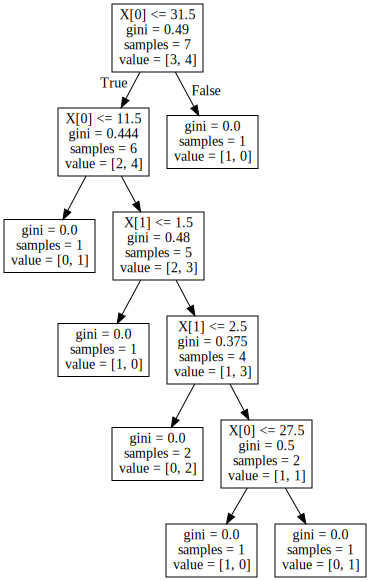

In [14]:
graph